In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import tree, preprocessing
from datetime import datetime
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [27]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

In [3]:
cd /Users/deepsha/downloads

/Users/deepsha/Downloads


In [4]:
df = pd.read_csv("df_model.csv", dtype={"COUNTY": "string"})
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE     COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833    CA     Plumas   
1       2004        Lightning  38.933056 -120.404444    CA     Placer   
2       2004   Debris Burning  38.984167 -120.735556    CA  El Dorado   
3       2004        Lightning  38.559167 -119.913333    CA     Alpine   
4       2004        Lightning  38.559167 -119.933056    CA     Alpine   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2   Wednesday  
1     2004-05-12       0.25               A         0.0      5   Wednesday  
2     2004-05-31       0.10               A         0.0      5      Monday  
3     2004-06-28       0.10               A         5.0      6      Monday  
4     2004-06-28       0.10               A         5.0      6      Monday  


In [28]:
df.shape

(1880465, 10)

In [6]:
df.isna().sum()

FIRE_YEAR           0
STAT_CAUSE_DESCR    0
LATITUDE            0
LONGITUDE           0
STATE               0
COUNTY              0
DISCOVERY_DATE      0
FIRE_SIZE           0
FIRE_SIZE_CLASS     0
Difference          0
MONTH               0
DAY_OF_WEEK         0
dtype: int64

In [7]:
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['COUNTY'] = le.fit_transform(df['COUNTY'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
print(df.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005                 7  40.036944 -121.005833      4    1214   
1       2004                 6  38.933056 -120.404444      4    1211   
2       2004                 3  38.984167 -120.735556      4     499   
3       2004                 6  38.559167 -119.913333      4      28   
4       2004                 6  38.559167 -119.933056      4      28   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2            6  
1     2004-05-12       0.25               A         0.0      5            6  
2     2004-05-31       0.10               A         0.0      5            1  
3     2004-06-28       0.10               A         5.0      6            1  
4     2004-06-28       0.10               A         5.0      6            1  


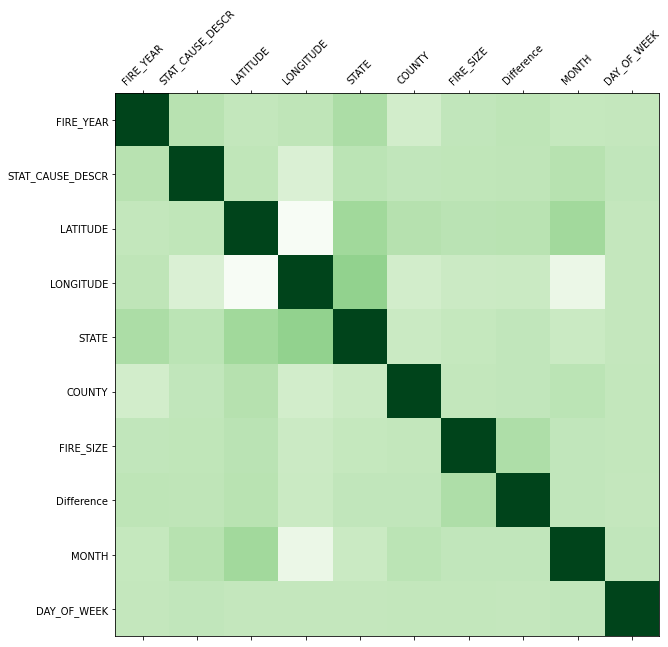

In [15]:
def plot_corr(df,size=10):
    corr = df.corr()  
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Greens)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df)

In [12]:
df = df.drop(['DISCOVERY_DATE','FIRE_SIZE_CLASS'], axis=1)
print(df.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005                 7  40.036944 -121.005833      4    1214   
1       2004                 6  38.933056 -120.404444      4    1211   
2       2004                 3  38.984167 -120.735556      4     499   
3       2004                 6  38.559167 -119.913333      4      28   
4       2004                 6  38.559167 -119.933056      4      28   

   FIRE_SIZE  Difference  MONTH  DAY_OF_WEEK  
0       0.10         0.0      2            6  
1       0.25         0.0      5            6  
2       0.10         0.0      5            1  
3       0.10         5.0      6            1  
4       0.10         5.0      6            1  


### Randon Forest Priliminary

In [16]:
X = df.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = df['STAT_CAUSE_DESCR'].values

In [33]:
len(df['STAT_CAUSE_DESCR'].drop_duplicates())

13

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [20]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5929113340660119


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify =y )

In [23]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5922306519658241


### LGBM - preliminary 

In [29]:
#Scaling using the Standard Scaler
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)

In [31]:
d_train=lgb.Dataset(X_train, label=y_train)

In [61]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=13
params['num_leaves']=50

In [62]:
clf=lgb.train(params,d_train,100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1316325, number of used features: 9
[LightGBM] [Info] Start training from score -1.897950
[LightGBM] [Info] Start training from score -3.206269
[LightGBM] [Info] Start training from score -3.423098
[LightGBM] [Info] Start training from score -1.479053
[LightGBM] [Info] Start training from score -2.545126
[LightGBM] [Info] Start training from score -5.092589
[LightGBM] [Info] Start training from score -1.908820
[LightGBM] [Info] Start training from score -1.758623
[LightGBM] [Info] Start training from score -2.425369
[LightGBM] [Info] Start tra

In [63]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [64]:
precision_score(y_pred_1,y_test,average=None).mean()

0.3508721124487376

In [65]:
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.545456801503173

## New model with less labels

In [68]:
df_less = pd.read_csv("df_model.csv", dtype={"COUNTY": "string"})
print(df_less.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE     COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833    CA     Plumas   
1       2004        Lightning  38.933056 -120.404444    CA     Placer   
2       2004   Debris Burning  38.984167 -120.735556    CA  El Dorado   
3       2004        Lightning  38.559167 -119.913333    CA     Alpine   
4       2004        Lightning  38.559167 -119.933056    CA     Alpine   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2   Wednesday  
1     2004-05-12       0.25               A         0.0      5   Wednesday  
2     2004-05-31       0.10               A         0.0      5      Monday  
3     2004-06-28       0.10               A         5.0      6      Monday  
4     2004-06-28       0.10               A         5.0      6      Monday  


In [69]:
le = preprocessing.LabelEncoder()
df_less['STATE'] = le.fit_transform(df_less['STATE'])
df_less['COUNTY'] = le.fit_transform(df_less['COUNTY'])
df_less['DAY_OF_WEEK'] = le.fit_transform(df_less['DAY_OF_WEEK'])
print(df_less.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833      4    1214   
1       2004        Lightning  38.933056 -120.404444      4    1211   
2       2004   Debris Burning  38.984167 -120.735556      4     499   
3       2004        Lightning  38.559167 -119.913333      4      28   
4       2004        Lightning  38.559167 -119.933056      4      28   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2            6  
1     2004-05-12       0.25               A         0.0      5            6  
2     2004-05-31       0.10               A         0.0      5            1  
3     2004-06-28       0.10               A         5.0      6            1  
4     2004-06-28       0.10               A         5.0      6            1  


In [70]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     



In [72]:
df_less['LABEL'] = df_less['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) 
df_less = df_less.drop('STAT_CAUSE_DESCR',axis=1)
print(df_less.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  COUNTY DISCOVERY_DATE  FIRE_SIZE  \
0       2005  40.036944 -121.005833      4    1214     2005-02-02       0.10   
1       2004  38.933056 -120.404444      4    1211     2004-05-12       0.25   
2       2004  38.984167 -120.735556      4     499     2004-05-31       0.10   
3       2004  38.559167 -119.913333      4      28     2004-06-28       0.10   
4       2004  38.559167 -119.933056      4      28     2004-06-28       0.10   

  FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  LABEL  
0               A         0.0      2            6      4  
1               A         0.0      5            6      1  
2               A         0.0      5            1      2  
3               A         5.0      6            1      1  
4               A         5.0      6            1      1  


In [73]:
df_less = df_less.drop(['DISCOVERY_DATE','FIRE_SIZE_CLASS'], axis=1)
print(df_less.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  COUNTY  FIRE_SIZE  Difference  \
0       2005  40.036944 -121.005833      4    1214       0.10         0.0   
1       2004  38.933056 -120.404444      4    1211       0.25         0.0   
2       2004  38.984167 -120.735556      4     499       0.10         0.0   
3       2004  38.559167 -119.913333      4      28       0.10         5.0   
4       2004  38.559167 -119.933056      4      28       0.10         5.0   

   MONTH  DAY_OF_WEEK  LABEL  
0      2            6      4  
1      5            6      1  
2      5            1      2  
3      6            1      1  
4      6            1      1  


In [75]:
len(df_less['LABEL'].drop_duplicates())

4

In [76]:
X = df_less.drop(['LABEL'], axis=1).values
y = df_less['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7107686035381289


In [77]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 67006  11538    954   3947]
 [ 10312 201077  16606  20695]
 [  1609  34723  41458   6830]
 [  5960  44710   5226  91489]]


### LGBM with Less labels 

In [78]:
#Scaling using the Standard Scaler
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=5
params['num_leaves']=50

In [84]:
clf = lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1316325, number of used features: 9
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.908820
[LightGBM] [Info] Start training from score -0.818389
[LightGBM] [Info] Start training from score -1.897950
[LightGBM] [Info] Start training from score -1.344280


In [86]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.6612737972843621

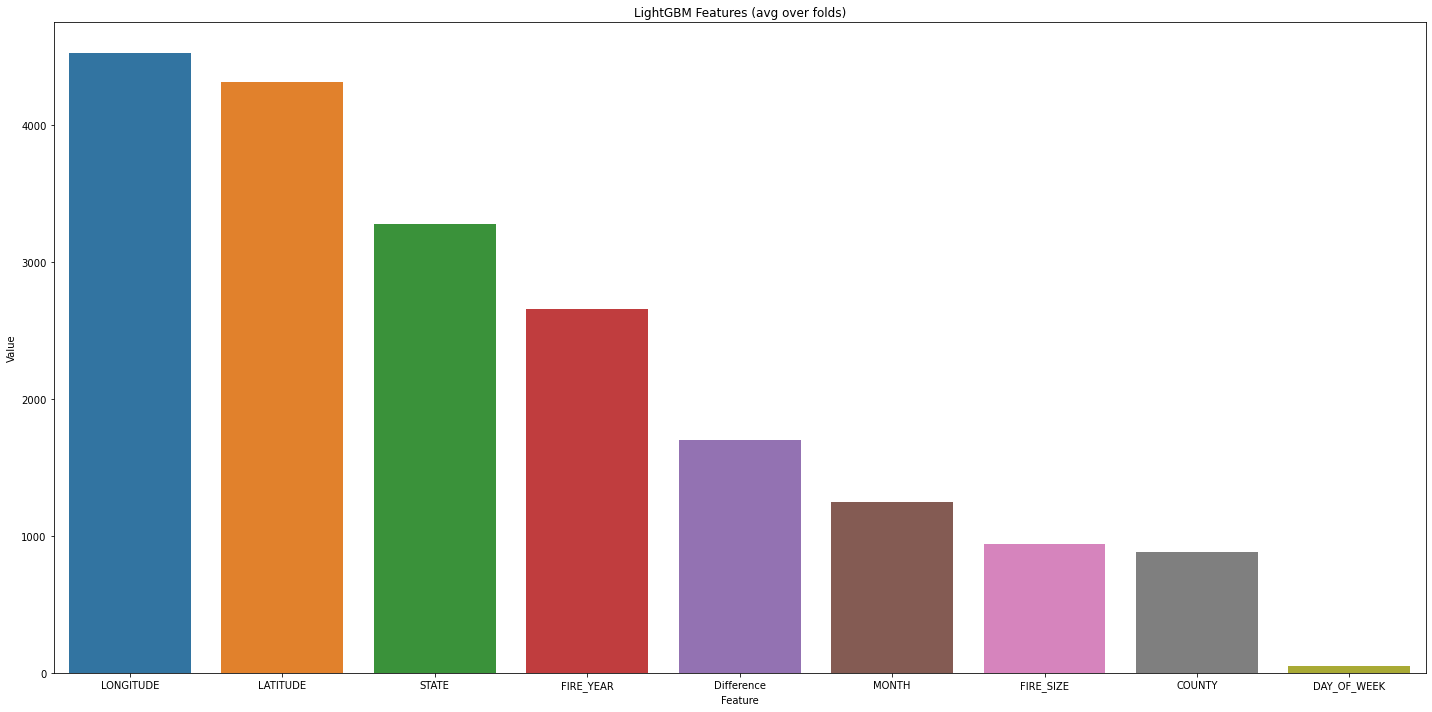

<Figure size 432x288 with 0 Axes>

In [104]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),c.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [102]:
c = df_less.drop(['LABEL'], axis=1)
c.columns

Index(['FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_SIZE',
       'Difference', 'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

### Further Analysis - Removing Others Label

In [106]:
df_less1 = df_less[df_less['LABEL'] != 4]
df_less1.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_SIZE,Difference,MONTH,DAY_OF_WEEK,LABEL
1,2004,38.933056,-120.404444,4,1211,0.25,0.0,5,6,1
2,2004,38.984167,-120.735556,4,499,0.10,0.0,5,1,2
3,2004,38.559167,-119.913333,4,28,0.10,5.0,6,1,1
4,2004,38.559167,-119.933056,4,28,0.10,5.0,6,1,1
5,2004,38.635278,-120.103611,4,29,0.10,1.0,6,6,1


In [108]:
X = df_less1.drop(['LABEL'], axis=1).values
y = df_less1['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))
y_pred = clf_rf.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

0.7935522396650215
[[ 68281  13864   1399]
 [ 11381 219572  17890]
 [  1949  39602  43044]]


In [109]:
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=5
params['num_leaves']=50

In [111]:
clf = lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 972955, number of used features: 9
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.610070
[LightGBM] [Info] Start training from score -0.515105
[LightGBM] [Info] Start training from score -1.596084
[LightGBM] [Info] Start training from score -34.538776


In [112]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.7506439126868786

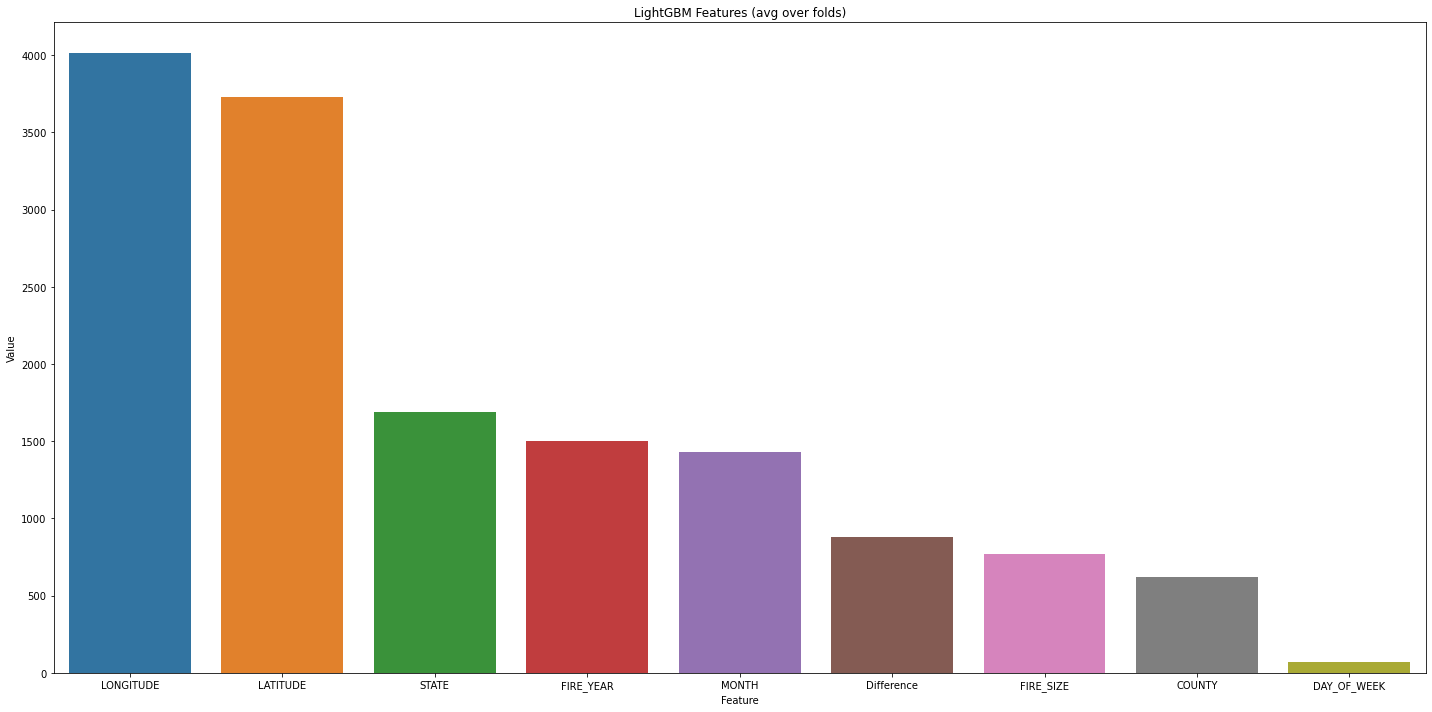

<Figure size 432x288 with 0 Axes>

In [113]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),c.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-02.png')

In [ ]:
##